In [21]:
import pandas as pd
import pyreadstat

# Download the data files from https://www.oecd.org/education/talis/talis-2018-data.htm
# Change the first letter of the loaded data filename for different ISCED levels
# A = ISCED level 1
# B = ISCED level 2
# C = ISCED level 3
df, meta = pyreadstat.read_file_multiprocessing(pyreadstat.read_sav, "CTGINTT3.sav", num_processes=8, apply_value_formats=True) 

In [22]:
employment_column = "TT3G10A"
meta.column_names_to_labels[employment_column]

'Curr. emply. status as a tch (working h) My employment status at this school'

In [23]:
full_time_df = df.loc[df[employment_column] == "Full-time (more than 90% of full-time hours)"]
full_time_df[employment_column]

0        Full-time (more than 90% of full-time hours)
1        Full-time (more than 90% of full-time hours)
2        Full-time (more than 90% of full-time hours)
3        Full-time (more than 90% of full-time hours)
4        Full-time (more than 90% of full-time hours)
                             ...                     
38076    Full-time (more than 90% of full-time hours)
38077    Full-time (more than 90% of full-time hours)
38078    Full-time (more than 90% of full-time hours)
38079    Full-time (more than 90% of full-time hours)
38080    Full-time (more than 90% of full-time hours)
Name: TT3G10A, Length: 30344, dtype: category
Categories (4, object): ['Full-time (more than 90% of full-time hours)', 'Part-time (50-70% of full-time hours)', 'Part-time (71-90% of full-time hours)', 'Part-time (less than 50% of full-time hours)']

In [24]:
task_columns = [
    'TT3G17',
    'TT3G18A',
    'TT3G18B',
    'TT3G18C',
    'TT3G18D',
    'TT3G18E',
    'TT3G18F',
    'TT3G18G',
    'TT3G18H',
    'TT3G18I',
    'TT3G18J',
]
task_labels = [meta.column_names_to_labels[col] for col in task_columns]
task_labels

['Hours spent on teaching at this school during most recent complete calendar week',
 'Hours spent on tasks Indiv. planning or preparation of lessons',
 'Hours spent on tasks Team work and dialogue w. colleagues within school',
 'Hours spent on tasks Marking correcting of student work',
 'Hours spent on tasks Counselling students',
 'Hours spent on tasks Participation in school management',
 'Hours spent on tasks General administrative work',
 'Hours spent on tasks Professional development activities',
 'Hours spent on tasks Communication and co-operation with parents',
 'Hours spent on tasks Engaging in extracurricular activities',
 'Hours spent on tasks Other work tasks']

In [25]:
mean_time_on_tasks = full_time_df.groupby("IDCNTRY")[task_columns].mean()
mean_time_on_tasks = mean_time_on_tasks.pipe(lambda df: df.loc[df.sum(axis=1).sort_values(ascending=True, na_position="first").index])
mean_time_on_tasks

,TT3G17,TT3G18A,TT3G18B,TT3G18C,TT3G18D,TT3G18E,TT3G18F,TT3G18G,TT3G18H,TT3G18I,TT3G18J
IDCNTRY,,,,,,,,,,,
Denmark,17.518882,9.614786,2.476672,5.183307,2.171094,1.034375,2.268178,1.232759,0.199843,0.694118,2.320350
Turkey,22.982916,3.923154,2.092039,2.285980,2.184312,2.508932,2.333763,1.984552,1.626770,1.918300,2.252607
Croatia,20.051741,8.983018,2.157767,4.311650,2.050485,0.599125,2.279825,2.075316,1.123301,1.370874,1.579882
Sweden,17.802885,7.942947,3.696902,5.646002,2.546355,0.894049,3.931655,1.321332,1.067896,0.534358,2.453197
Portugal,20.219068,7.155415,2.368273,7.165963,1.432946,1.551797,2.679930,1.498765,0.982753,1.471127,1.625227
Viet Nam,16.818287,10.348810,3.029547,5.013820,2.324366,2.158157,1.805075,3.654973,1.712697,2.741267,2.315159
Slovenia,19.785181,8.431237,2.619403,5.522133,2.951974,1.052828,3.236926,2.886631,2.090763,2.603955,2.826040
Chinese Taipei,18.833458,8.049217,3.195377,3.956376,3.439388,4.507457,4.539896,2.817232,1.616735,2.266791,1.987165
Alberta (Canada),26.709939,6.731359,2.759184,5.700000,2.809184,1.917178,2.934493,1.635619,1.630502,3.340491,1.997877


Text(0.5, 1.0, 'Mean hours spent on teaching activities')

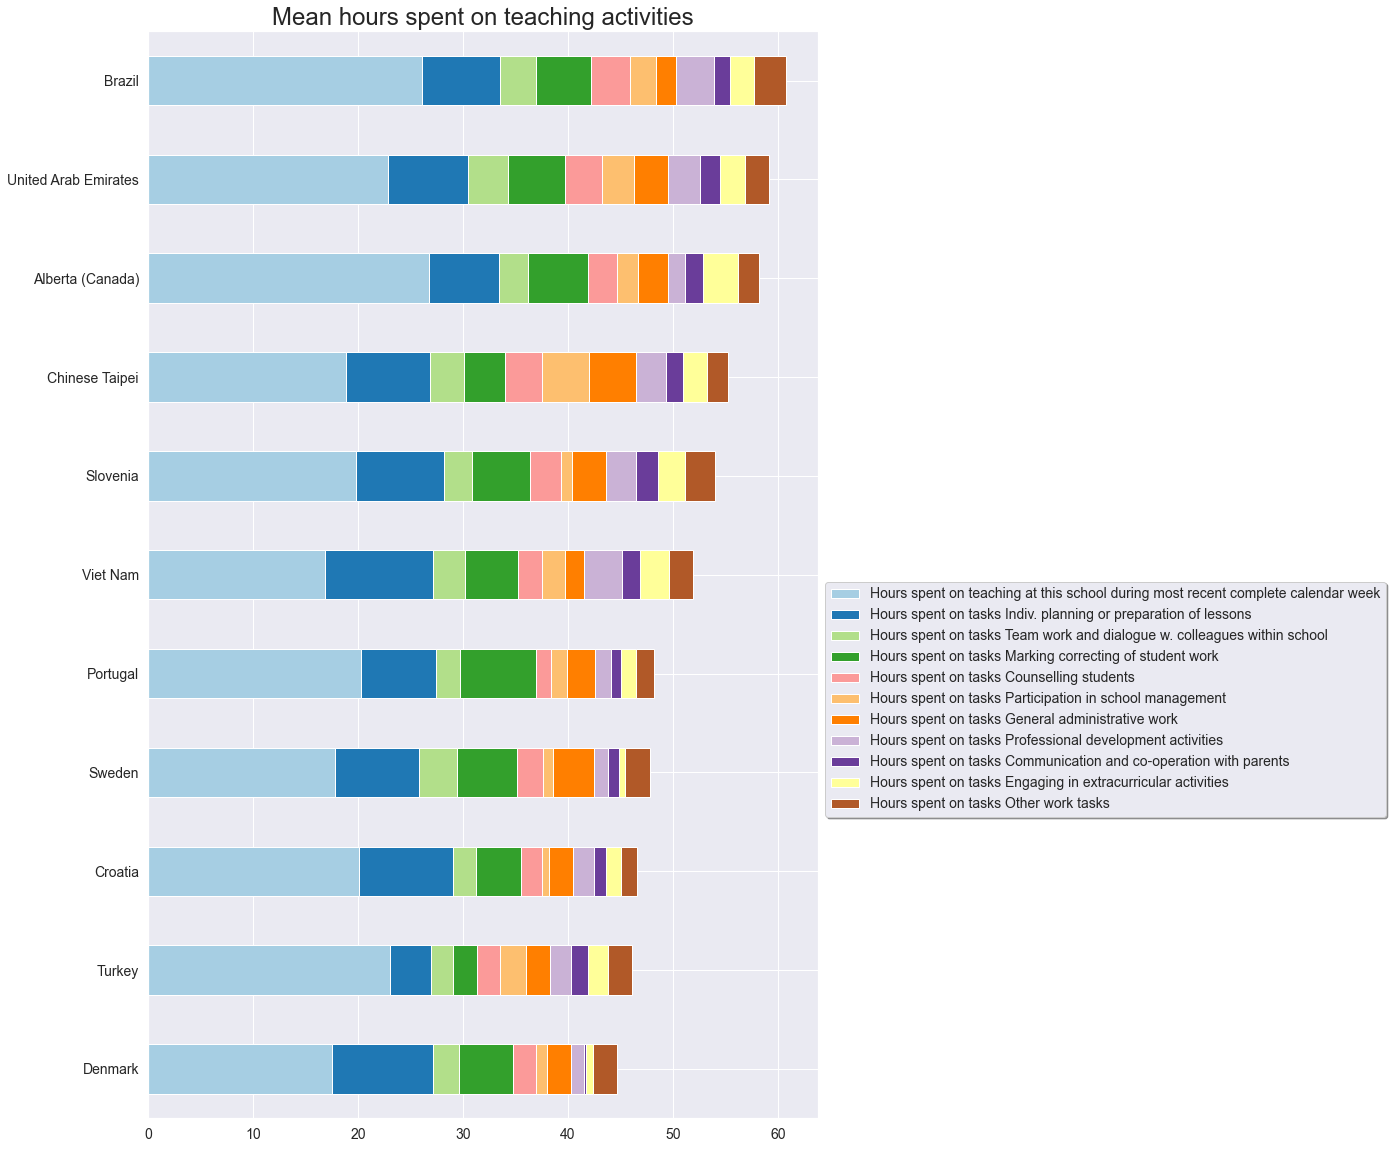

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()

ax = mean_time_on_tasks.plot.barh(stacked=True, figsize=(12,20), colormap="Paired", fontsize=14)
ax.legend(
    task_labels,
    fontsize=14,
    bbox_to_anchor=(1, 0.5),
    # bbox_to_anchor =(0.5, -0.2), loc='lower center',
    fancybox=True,
    shadow=True,
)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Mean hours spent on teaching activities", fontsize=24)

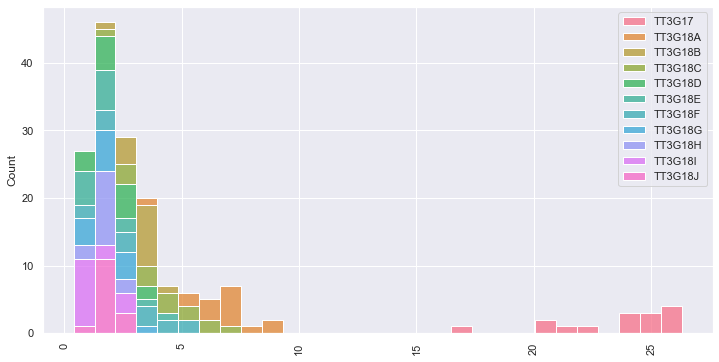

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
sns.histplot(mean_time_on_tasks, multiple="stack", ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Mean hours spent on teaching activities')

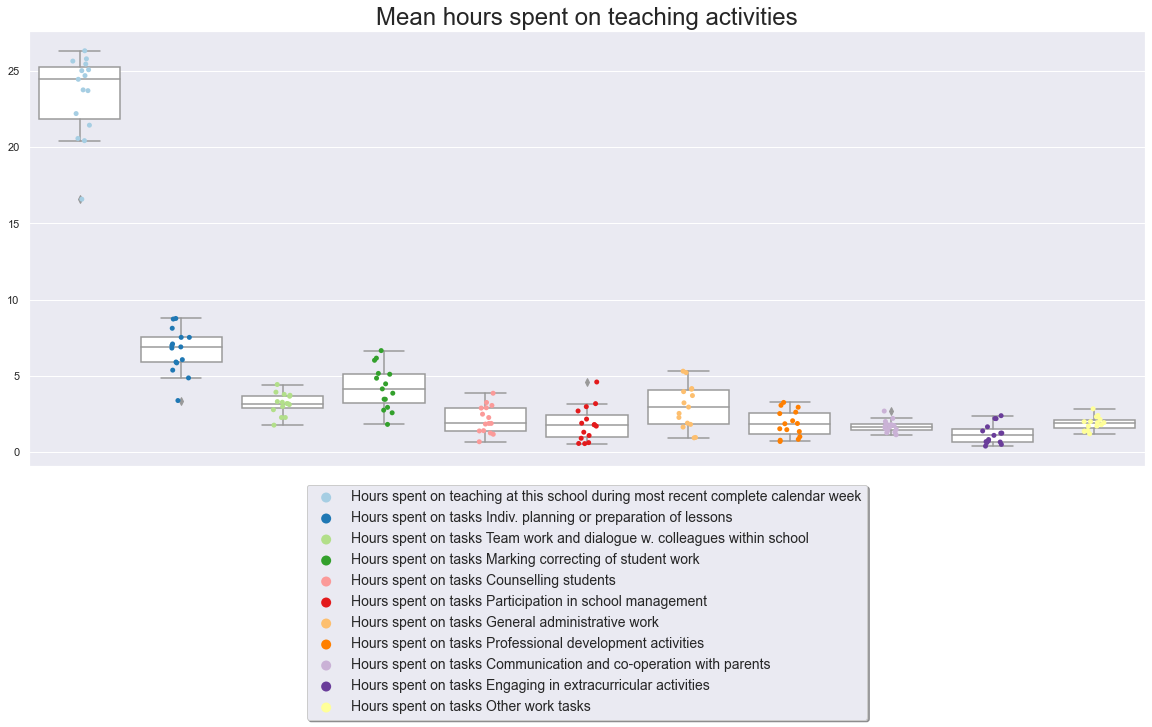

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.stripplot(data=mean_time_on_tasks, palette="Paired", ax=ax)
sns.boxplot(data=mean_time_on_tasks, color="1", ax=ax)
ax.set_xticklabels([])
ax.legend(
    labels=task_labels,
    fontsize=14,
    # bbox_to_anchor=(1, 0.5),
    bbox_to_anchor =(0.5, -0.6), loc='lower center',
    fancybox=True,
    shadow=True,
    markerscale=2,
)
ax.set_title("Mean hours spent on teaching activities", fontsize=24)

In [11]:
mean_time_on_tasks.median()

TT3G17     24.449994
TT3G18A     6.901571
TT3G18B     3.190889
TT3G18C     4.150553
TT3G18D     1.887546
TT3G18E     1.797432
TT3G18F     2.959077
TT3G18G     1.865510
TT3G18H     1.650442
TT3G18I     1.104069
TT3G18J     1.937522
dtype: float64

In [27]:
len(mean_time_on_tasks.values)

11